<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula04c_ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

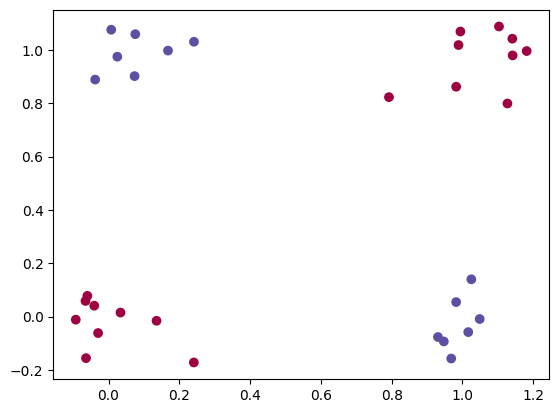

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


def plot_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    return plt


def plot_hiperplano(vector, intercept):
  xs = np.array([0, 1])
  ys = -(vector[0] * xs + intercept) / vector[1]
  plt.plot(xs, ys, '-')


def make_logical_dataset(n=40, func=lambda a, b: bool(a) != bool(b)):
  X, y = make_blobs(n_samples=n,
                     centers=[[0,0],[1,0],[1,1],[0,1]],
                     cluster_std=0.1)
  y = np.array([func(a>0.5, b>0.5) for a, b in zip(X[:, 0], X[:, 1])], dtype=int) * 2 - 1
  return X, y


def define_axes(X, offset):
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]


def plot_predictions(clf, X, offset = 0.5):
    axes = define_axes(X, offset)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)


X, y = make_logical_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
_ = plot_dataset(X_train, y_train)

1.0


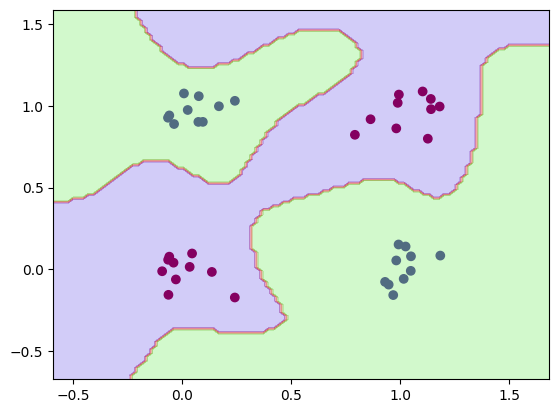

In [303]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(a):
  return np.where(a >= 0, 1, -1)

def tanh(a):
  return np.tanh(a)

def include_bias(X):
  return np.hstack((np.ones((X.shape[0], 1)), X))


class ExtremeLearningMachine(BaseEstimator, ClassifierMixin):
  def __init__(self, n_hidden=20):
    self.n_hidden = n_hidden

  def fit(self, X, y):
    Xb = include_bias(X)
    self.ihw = np.random.normal(size=(Xb.shape[1], self.n_hidden))
    self.pH = Xb @ self.ihw
    self.H = tanh(self.pH)
    Hb = include_bias(self.H)
    self.how = np.linalg.pinv(Hb) @ y
    return self

  def predict(self, X):
    Xb = include_bias(X)
    self.pH = Xb @ self.ihw
    self.H = tanh(self.pH)
    Hb = include_bias(self.H)
    y_pred = Hb @ self.how
    return sign(y_pred)


model = ExtremeLearningMachine()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_dataset(X, y)
plot_predictions(model, X)
plt.show()

1.0


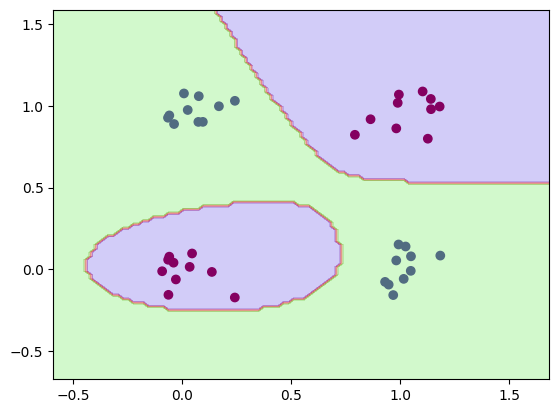

In [315]:
model = ExtremeLearningMachine(5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_dataset(X, y)
plot_predictions(model, X)
plt.show()